# Assignment Monte Carlo in Medical Physics
## Random Number Generator - SERIE 1
**Assignment 1)**
Use the rand function and define a one-dimensional random number generator. Plot a
histogram of the values sampled together with the expected value. Try with different
sampling numbers.

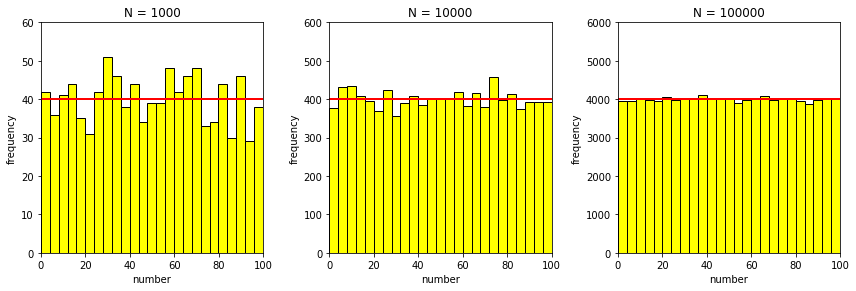

In [2]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

N=1000
#x = rand(N)
min = 0.
max = 100.

def RNG(min, max, size):
    x = rand(size)
    return min + (max-min)*x

plt.figure(figsize=[12, 8])
i = 1
for size in [1000, 10000, 100000]:
    x = RNG(min,max,size)
    nbins = 25
    plt.subplot(1, 3, i)
    plt.xlabel('number')
    plt.ylabel('frequency')
    plt.title('N = ' + str(size))
    plt.axis([min, max, 0, 1.5*(size/nbins)])
    n, bins, patches = plt.hist(x, nbins, color='yellow', ec='black')
    step = 0.2
    y = (size/nbins)*np.ones(len(x))
    plt.plot(x, y, linestyle='-', color='r', markersize=0.4)
    i += 1

plt.tight_layout()
plt.subplots_adjust(bottom=0.5, top=0.9)
plt.show()

**Assignment 2)**
Use the rand function and define a two-dimensional random number generator. Generate a
scatter plot of the values sampled. Try with different sampling numbers.

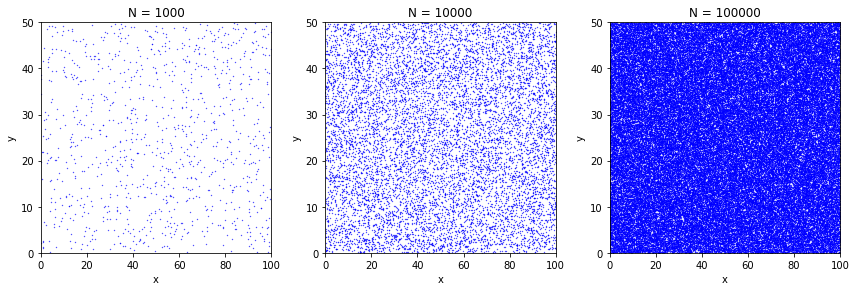

In [3]:
def RNG2(minx, maxx, miny, maxy, size):
    x = rand(size,2)
    for i in range(len(x)):
        x[i][0] = minx + (maxx - minx)*x[i][0]
        x[i][1] = miny + (maxy - miny)*x[i][1]
    return x

plt.figure(figsize=[12, 8])
i = 1
minx = miny = 0; maxx = 100; maxy = 50
for size in [1000, 10000, 100000]:
    x = RNG2(minx, maxx, miny, maxy, size)
    nbins = 25
    plt.subplot(1, 3, i)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('N = ' + str(size))
    plt.axis([minx, maxx, miny, maxy])
    plt.scatter(x[:,0], x[:,1], 0.1, color='blue')
    i += 1

plt.tight_layout()
plt.subplots_adjust(bottom=0.5, top=0.9)
plt.show()

**Assignment 3)**
Create a random number generator of the form

$$ I_{j+1} = a I_j + c $$

with a = 663608941, c = 0, modulo $2^{32}$ and $I_0$ = 987654321 (see lecture). Use the generated
random numbers in one and two dimensions and created corresponding plots.
Now try values for a and $I_0$ and study the sensitivity of these values with respect of the
usefulness of the random number generators.

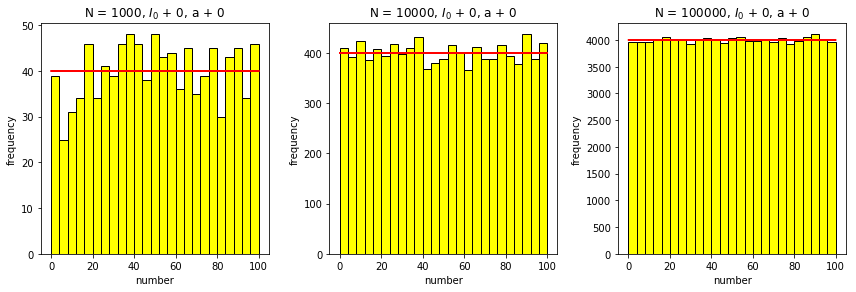

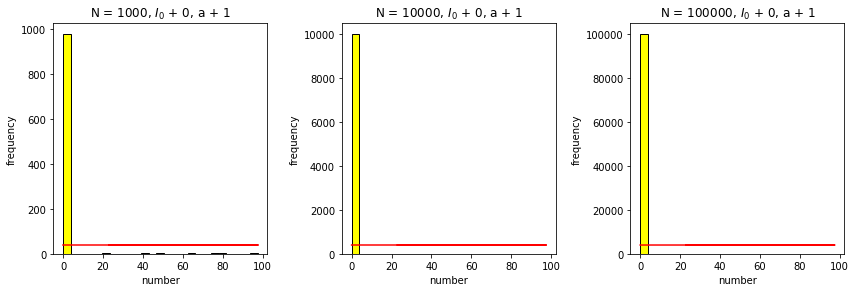

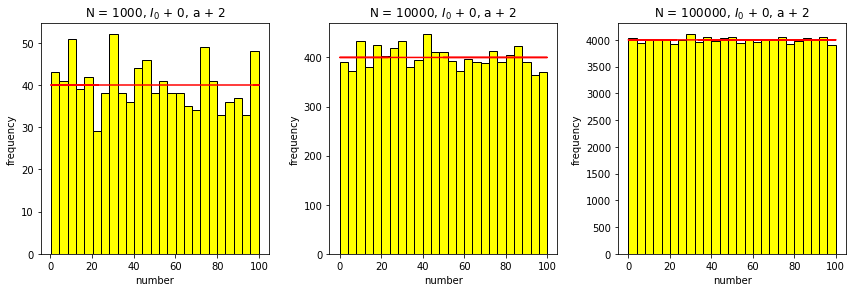

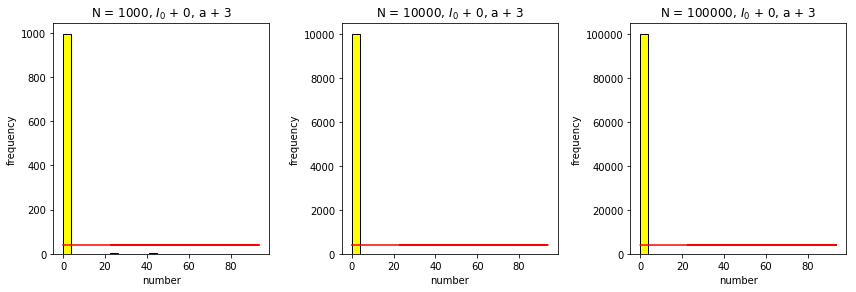

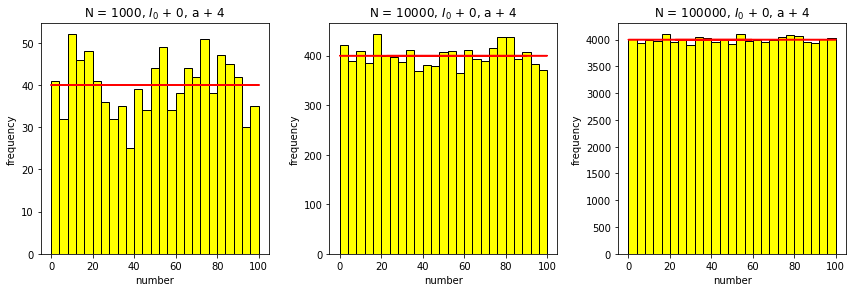

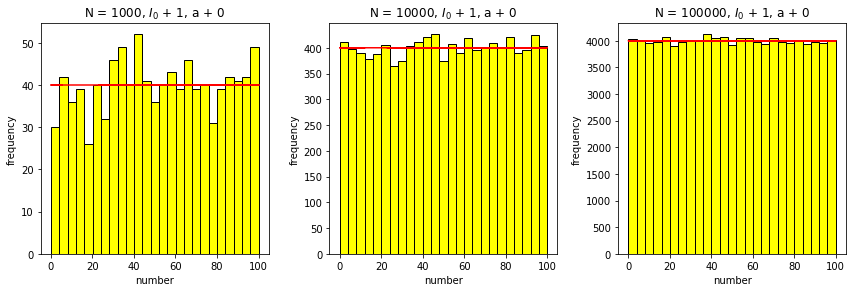

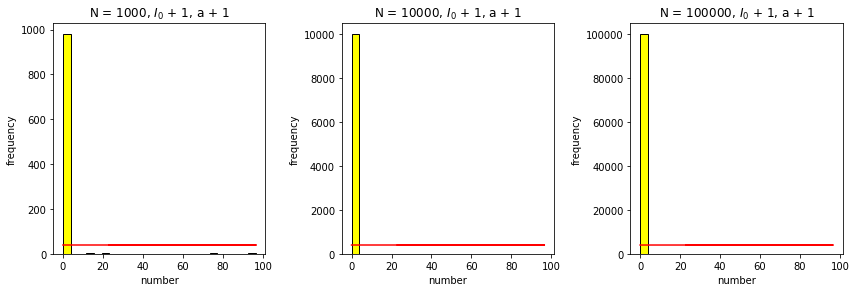

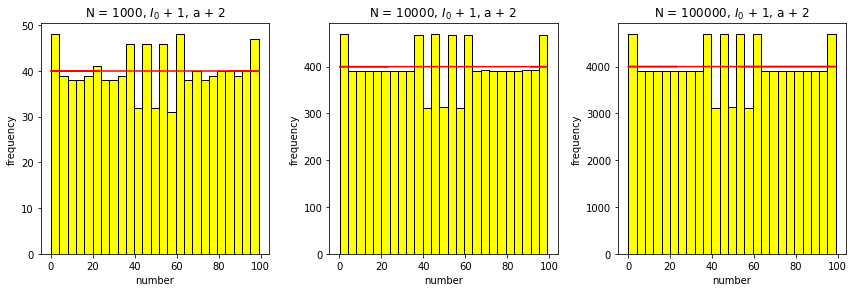

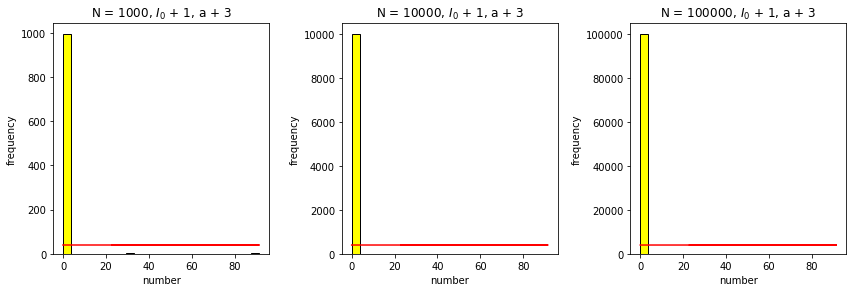

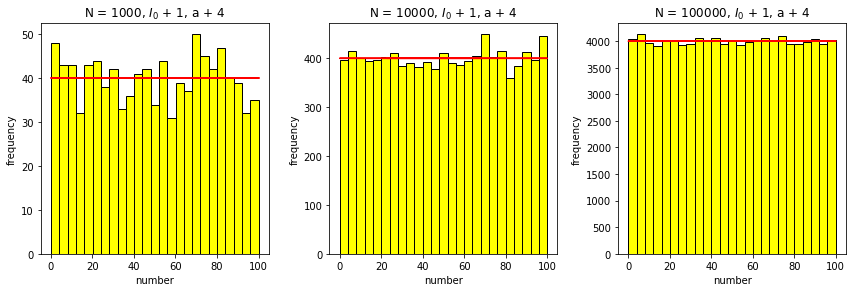

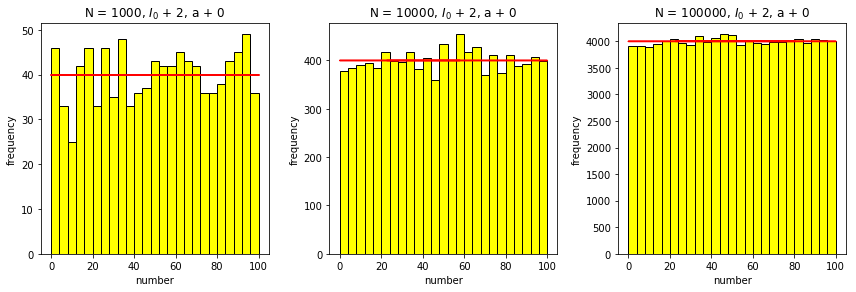

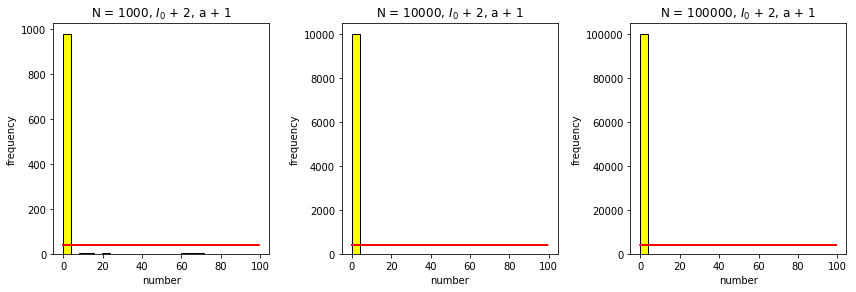

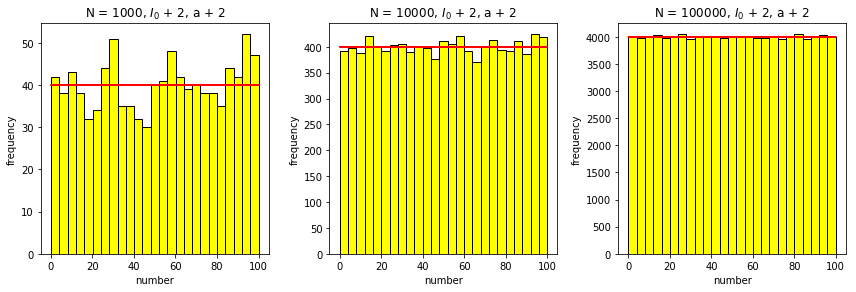

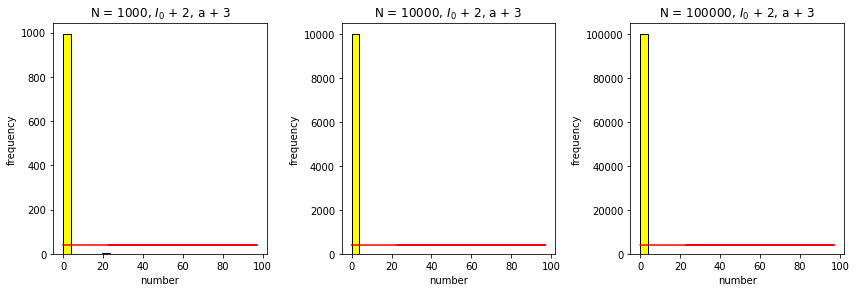

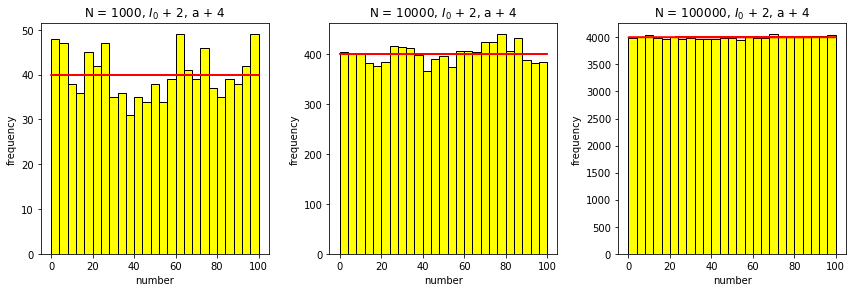

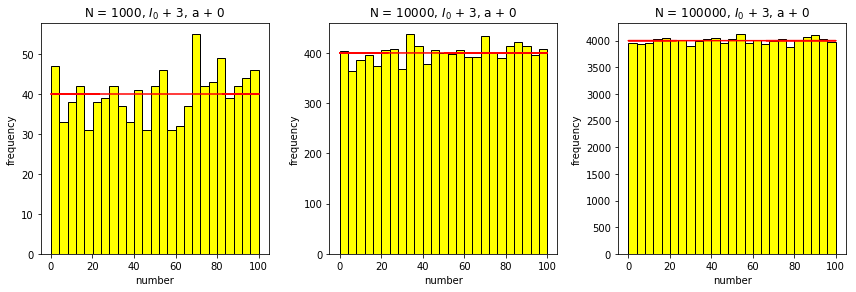

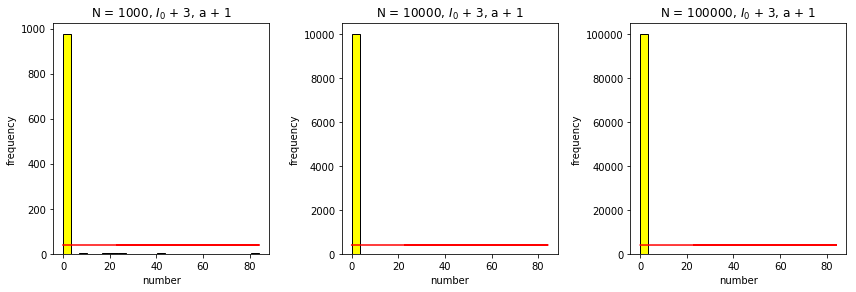

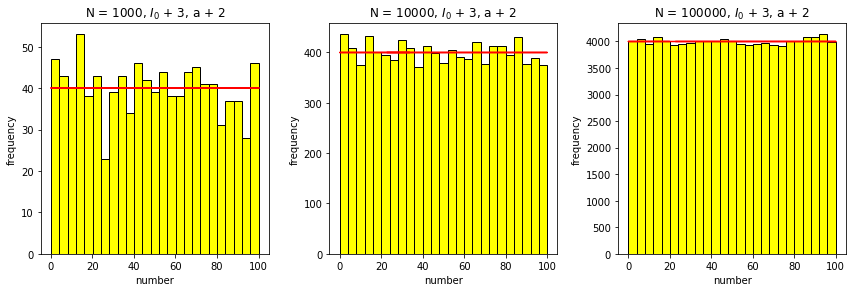

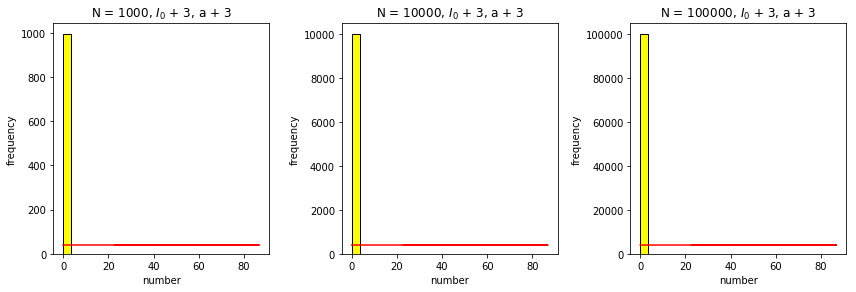

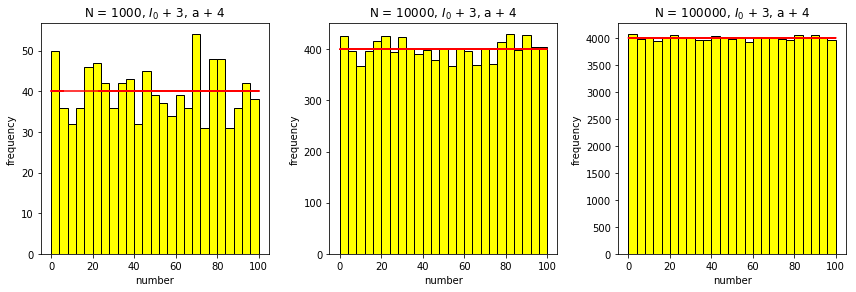

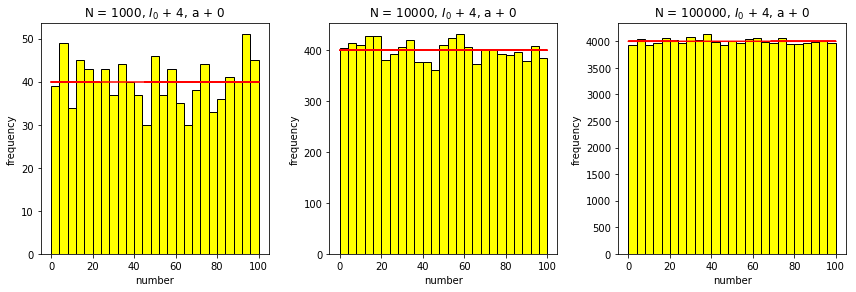

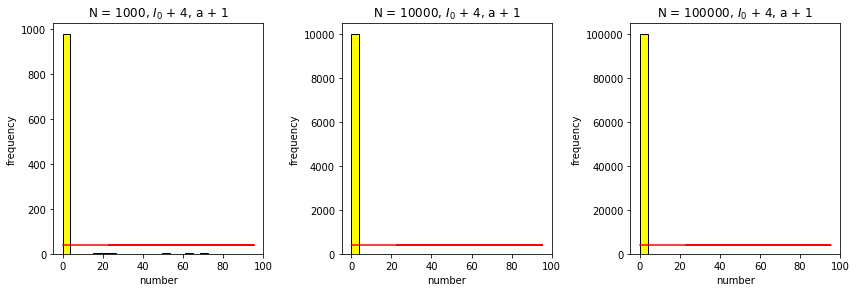

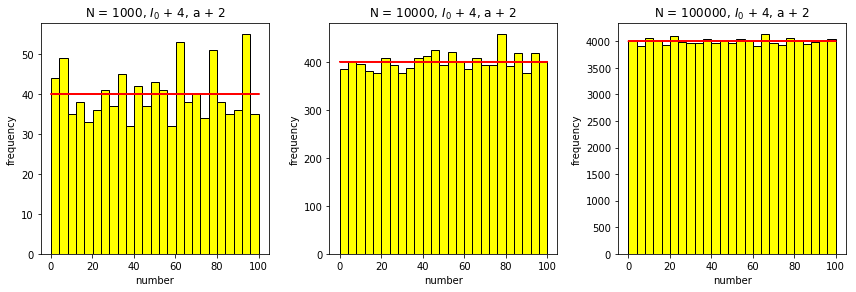

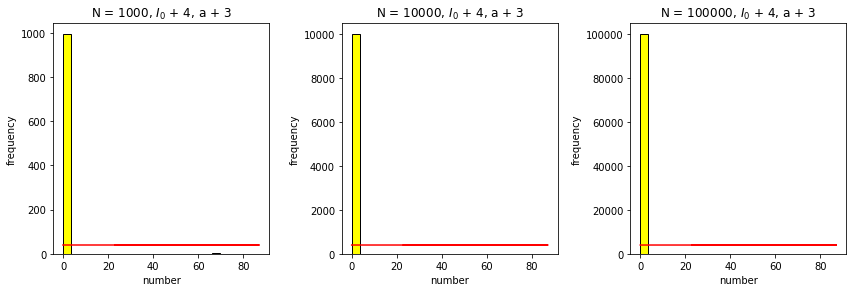

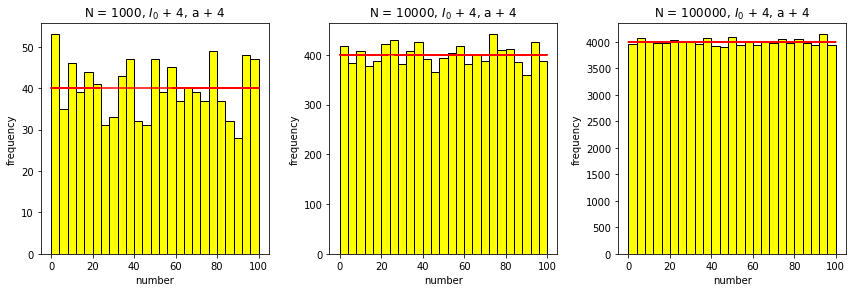

In [43]:
def PseudoRandomGenerator(size, seed, a):
    c = 0; m = 2**32
    x = np.empty(size)
    x[0] = seed
    for i in range(1, size):
        x[i] = (a*x[i-1] + c) % m
    return x/float(m)

def PseudoRandom(min, max, size, seed, a):
    x = PseudoRandomGenerator(size, seed, a)
    return min + (max - min)*x

plt.figure(figsize=[12, 8])

seed = 987654321
a = 663608941
min = 0.; max = 100.
for j in range(5):
    for k in range(5):
        i = 1
        plt.figure(figsize=[12,8])
        for size in [1000, 10000, 100000]:
            x = PseudoRandom(min, max, size, seed+j, a+k)
            nbins = 25
            plt.subplot(1, 3, i)
            plt.xlabel('number')
            plt.ylabel('frequency')
            plt.title('N = ' + str(size) + ', $I_0$ + ' + str(j) + ', a + ' + str(k))
            #plt.axis([min, max, 0, 1.5*(size/nbins)])
            n, bins, patches = plt.hist(x, nbins, color='yellow', ec='black')
            step = 0.2
            y = (size/nbins)*np.ones(len(x))
            plt.plot(x, y, linestyle='-', color='r', markersize=0.4)
            i += 1
        
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.5, top=0.9)
        plt.show()

By varying $I_0$ and $a$ of a unit at a time, we see that several combinations bring to instabilities.
We tried 25 different combinations of the parameters and only in 13/25 cases the number distributions approach a uniform distribution.
We conclude that only about 50% of the combinations explored produce random numbers.